<a href="https://colab.research.google.com/github/bdfd/Section6.Project02-Telco_Customer_Churning_Prediction/blob/main/2.0%20colab/0602_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecommunication Customer Churn Prediction

## Exploratory Data Analysis

The Background Introduction  
he data set includes information about:
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method,

paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)

In [96]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [97]:
#Code to verify the package installation
try:
  import execdata
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [98]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [99]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN
from collections import Counter

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [100]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [101]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [102]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [103]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [104]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction


In [105]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Section6.Project02-Telco_Customer_Churning_Prediction/main/1.0%20dataset/'
dataset_url_1 = 'S602_Mungged.csv'
dataset_url_2 = 'S602_Preprocessed.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(10)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,1,2,29.85,0
1,0,0,0,34,1,0,1,0,2,56.95,0
2,0,0,0,2,1,0,0,1,2,53.85,1
3,0,0,0,45,1,1,1,0,1,42.30,0
4,0,0,0,2,0,0,0,1,2,70.70,1
5,0,0,0,8,0,0,0,1,2,99.65,1
6,0,0,1,22,0,0,0,1,0,89.10,0
7,0,0,0,10,1,0,0,0,2,29.75,0
8,0,1,0,28,0,1,0,1,2,104.80,1
9,0,0,1,62,1,0,1,0,1,56.15,0


In [106]:
target_feature = 'Churn'

In [107]:
print(f'the dataset_1 size is {df.shape} and target feature is {target_feature}')

the dataset_1 size is (7043, 11) and target feature is Churn


In [108]:
# Check column name and categories
df.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'], dtype=object)

In [109]:
df.nunique()

SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
OnlineSecurity         2
TechSupport            2
Contract               3
PaperlessBilling       2
PaymentMethod          3
MonthlyCharges      1585
Churn                  2
dtype: int64

In [110]:
df['PaymentMethod'].value_counts()

2    3977
1    1544
0    1522
Name: PaymentMethod, dtype: int64

In [111]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   Contract          7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   PaymentMethod     7043 non-null   int64  
 9   MonthlyCharges    7043 non-null   float64
 10  Churn             7043 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 605.4 KB


SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [112]:
# Varify the data type match with corresponding columns types
df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
OnlineSecurity        int64
TechSupport           int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
Churn                 int64
dtype: object

In [113]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.286668,0.290217,0.690473,0.592219,1.348573,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.452237,0.453895,0.833755,0.491457,0.812013,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,1.000000


Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


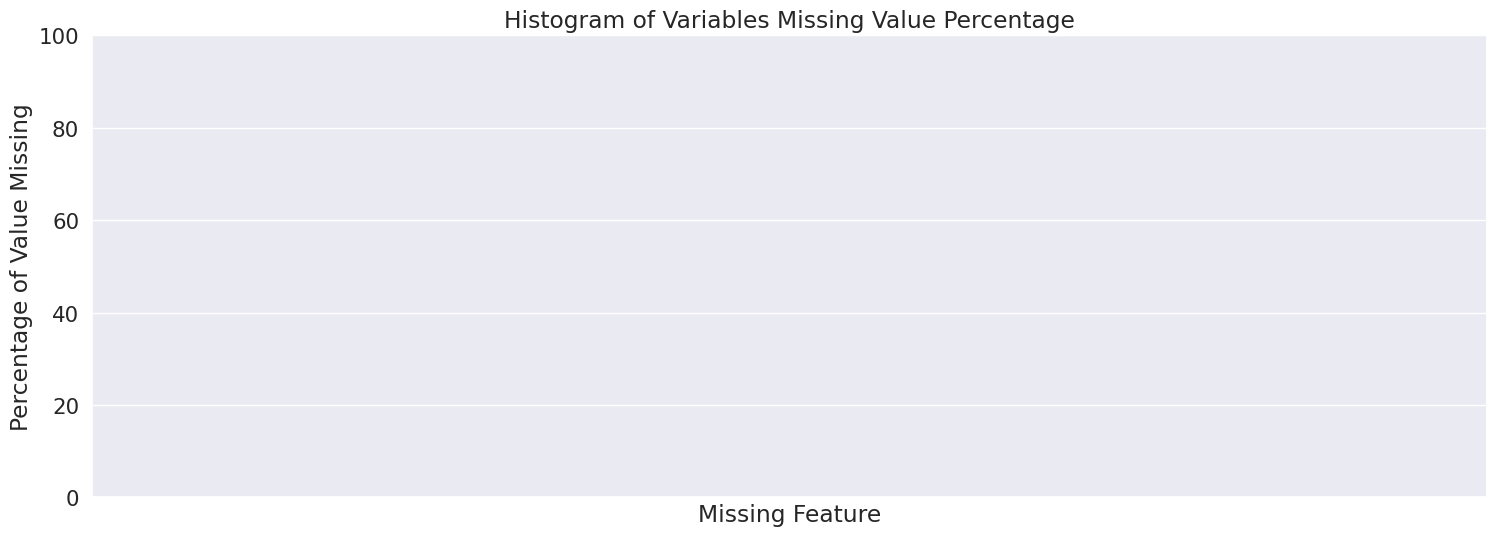

,index,Miss_Values,Miss_Rate,Available_Value


In [114]:
exe.analysis_graph.missing_value_analysis(df)

In [115]:
num_features = [feature for feature in df.columns if df[feature].dtypes!='O']
num_features

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [116]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=='O']
cat_features

[]

In [117]:
numeric_features = exe.data_preprocessing.column_identify(df,num_features)
numeric_features

{'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'OnlineSecurity': 2,
 'TechSupport': 2,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 3,
 'MonthlyCharges': 1585,
 'Churn': 2}

In [118]:
category_features = exe.data_preprocessing.column_identify(df,cat_features)
category_features

{}

### Feature Selection:
Selects only 10 feature which has higher correlation

## Data Train Prepartion

In [119]:
X_train, X_test, y_train, y_test = exe.data_preprocessing.sep_split(df,target_feature)

In [120]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4933,0,0,1,4,1,0,0,1,2,57.20
6489,0,0,0,1,0,0,0,1,2,18.85
3369,1,0,0,11,1,0,0,1,2,55.60
4705,0,0,0,6,1,0,0,1,2,78.95
3332,0,0,0,1,0,0,0,0,2,46.30
...,...,...,...,...,...,...,...,...,...,...
5242,0,0,0,20,0,0,0,1,2,88.70
51,0,0,0,15,1,0,0,1,0,99.10
631,0,1,0,46,1,0,0,0,1,55.00
828,0,1,1,60,0,0,1,0,2,90.95


In [121]:
# X_train.to_csv('S602_X_train.csv')
# y_train.to_csv('S602_y_train.csv')
# X_test.to_csv('S602_X_test.csv')
# y_test.to_csv('S602_y_test.csv')

###Apply Machine Learning Algorithm

In [122]:
# Linear Regression - LogisticRegression Classifier
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[915 185]
 [105 204]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1100
           1       0.52      0.66      0.58       309

    accuracy                           0.79      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



In [123]:
# Random Forest Classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')


Accuracy score : 0.8041163946061036
Confusion matrix :
 [[934 190]
 [ 86 199]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1124
           1       0.51      0.70      0.59       285

    accuracy                           0.80      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.83      0.80      0.81      1409



In [124]:
# DecisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')


Accuracy score : 0.7892122072391767
Confusion matrix :
 [[903 180]
 [117 209]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1083
           1       0.54      0.64      0.58       326

    accuracy                           0.79      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.80      0.79      0.80      1409



In [125]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[923 193]
 [ 97 196]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1116
           1       0.50      0.67      0.57       293

    accuracy                           0.79      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



In [126]:
# param_grid = {'n_estimators':[100, 150, 200, 250, 300],
#              'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
#              'min_samples_split': [2,3,4,5,6,7,8,9,10],
#              'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
#               'max_depth': [3,5,7,9,11,13,15,17,19],
#               'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#               'loss': ['deviance', 'exponential']
#               }

In [127]:
# gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
# gbc_optm.fit(X_train, y_train)

In [128]:
# gbc_optm.best_estimator_

In [129]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           max_depth=5, max_leaf_nodes=12, min_samples_leaf=5,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train, y_train)
pred = gbc_tunning.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[926 196]
 [ 94 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.83      0.86      1122
           1       0.50      0.67      0.57       287

    accuracy                           0.79      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



###Apply SMOTEENN for imbalance dataset then Apply algorithm

In [130]:
X, y = exe.data_preprocessing.sep(df, target_feature)

In [131]:
st=SMOTEENN()
X_st, y_st = st.fit_resample(X, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_st)))

The number of classes before fit Counter({0: 5174, 1: 1869})
The number of classes after fit Counter({1: 3864, 0: 2779})


In [132]:
# splitting the over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_st, y_st, test_size=0.2)

In [133]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9119638826185101
Confusion matrix :
 [[514  69]
 [ 48 698]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       583
           1       0.91      0.94      0.92       746

    accuracy                           0.91      1329
   macro avg       0.91      0.91      0.91      1329
weighted avg       0.91      0.91      0.91      1329



In [134]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9232505643340858
Confusion matrix :
 [[506  46]
 [ 56 721]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       552
           1       0.94      0.93      0.93       777

    accuracy                           0.92      1329
   macro avg       0.92      0.92      0.92      1329
weighted avg       0.92      0.92      0.92      1329



In [135]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.8961625282167043
Confusion matrix :
 [[486  62]
 [ 76 705]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       548
           1       0.92      0.90      0.91       781

    accuracy                           0.90      1329
   macro avg       0.89      0.89      0.89      1329
weighted avg       0.90      0.90      0.90      1329



In [136]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9262603461249059
Confusion matrix :
 [[513  49]
 [ 49 718]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       562
           1       0.94      0.94      0.94       767

    accuracy                           0.93      1329
   macro avg       0.92      0.92      0.92      1329
weighted avg       0.93      0.93      0.93      1329



In [137]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [138]:
# gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
# gbc_optm.fit(X_train_sap, y_train_sap)

In [139]:
# gbc_optm.best_estimator_

In [140]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(learning_rate=0.3, loss='deviance',
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=15,
                           min_samples_split=8, n_estimators=250)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9571106094808126
Confusion matrix :
 [[527  22]
 [ 35 745]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       549
           1       0.97      0.96      0.96       780

    accuracy                           0.96      1329
   macro avg       0.95      0.96      0.96      1329
weighted avg       0.96      0.96      0.96      1329



In [141]:
import pickle

In [142]:
filename = 'Customer_Churn_Model.pkl'

In [143]:
pwd!

'/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction'

In [144]:
pickle.dump(gbc_tunning, open(filename,'wb'))

In [145]:
load_model = pickle.load(open(filename, 'rb'))

In [146]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,0,DSL,No,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,29.85,29.85,No
1,Male,0,No,No,34,Yes,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Cheque,56.95,1889.50,No
2,Male,0,No,No,2,Yes,1,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,53.85,108.15,Yes
3,Male,0,No,No,45,No,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,E-Transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,1,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed Cheque,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,2,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed Cheque,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,0,DSL,Yes,No,No,No,No,No,Monthly,Yes,Mailed Cheque,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,2,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed Cheque,74.40,306.60,Yes


In [147]:
desire_list = df.columns.tolist()
del desire_list[-2:]
desire_list

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [157]:
df_sample = exe.data_preprocessing.column_not_drop(df2, desire_list)
df_sample.head(20)

The dropped column list are: ['Churn', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TotalCharges', 'gender']


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,Yes,No,1,No,No,Monthly,Yes,Mailed Cheque
1,0,No,No,34,Yes,No,One year,No,Mailed Cheque
2,0,No,No,2,Yes,No,Monthly,Yes,Mailed Cheque
3,0,No,No,45,Yes,Yes,One year,No,E-Transfer
4,0,No,No,2,No,No,Monthly,Yes,Mailed Cheque
5,0,No,No,8,No,No,Monthly,Yes,Mailed Cheque
6,0,No,Yes,22,No,No,Monthly,Yes,Credit card
7,0,No,No,10,Yes,No,Monthly,No,Mailed Cheque
8,0,Yes,No,28,No,Yes,Monthly,Yes,Mailed Cheque
9,0,No,Yes,62,Yes,No,One year,No,E-Transfer


In [158]:
df.head(20)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,1,2,29.85,0
1,0,0,0,34,1,0,1,0,2,56.95,0
2,0,0,0,2,1,0,0,1,2,53.85,1
3,0,0,0,45,1,1,1,0,1,42.30,0
4,0,0,0,2,0,0,0,1,2,70.70,1
5,0,0,0,8,0,0,0,1,2,99.65,1
6,0,0,1,22,0,0,0,1,0,89.10,0
7,0,0,0,10,1,0,0,0,2,29.75,0
8,0,1,0,28,0,1,0,1,2,104.80,1
9,0,0,1,62,1,0,1,0,1,56.15,0


In [149]:
sample_le = exe.data_preprocessing.fit_label_encode(df_sample, df_sample.columns)

In [150]:
sample_le[8].classes_

array(['Credit card', 'E-Transfer', 'Mailed Cheque'], dtype=object)

In [172]:
test_sample = (pd.DataFrame(columns=df_sample.columns,data=np.array([0,'No','No',49,'No','No','Monthly','Yes','E-Transfer']).reshape(1,9)))
test_sample

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,No,No,49,No,No,Monthly,Yes,E-Transfer


In [173]:
transformed_sample_df = exe.data_preprocessing.transform_label_encode(test_sample, test_sample.columns, sample_le)
transformed_sample_df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,0,0,49,0,0,0,1,1


In [174]:
MontlyCharges = 103.70
transformed_sample_df['MonthlyCharges'] = MontlyCharges
transformed_sample_df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,0,49,0,0,0,1,1,103.7


In [175]:
gbc_tunning.predict(transformed_sample_df)

array([1])